## Regresión Lineal: Costo de un incidente de seguridad

### Objetivo del ejercicio

Predecir el costo de un incidente de seguridad con base en el número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

### 1. Generación del conjunto de datos

In [1]:
import numpy as np
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

print("La longitud del conjunto de datos es: ", len(X))

La longitud del conjunto de datos es:  100


### 2. Visualización del conjunto de datos

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

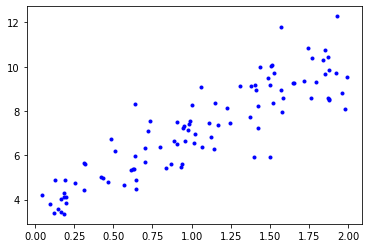

In [3]:
plt.plot(X, y, "b.")
plt.show()

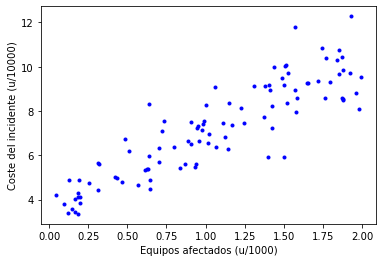

In [7]:
plt.plot(X, y, "b.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

### 3. Modificación del conjunto de datos

In [5]:
import pandas as pd

In [13]:
# Se convierte el conjunto de datos en un diccionario y posteriormente en un data frame.
data = {'n_equipos_afectados': X.flatten(), "Costo": y.flatten()}
df = pd.DataFrame(data)
df.head(15)

,n_equipos_afectados,Costo
0,0.181382,3.351724
1,0.194149,4.135514
2,1.145781,6.276392
3,0.311511,5.628361
4,0.193486,4.863318
5,1.850403,9.666035
6,0.957314,6.636845
7,0.421284,5.040653
8,1.437963,9.999925
9,1.524427,9.726524


Las magnitudes de las dos columnas del data frame no concuerdan o no tienen sentido con la realidad, hay que recordar que es un data frame inventado aleatoriamente, los datos se necesitan escalar.

In [18]:
# Escalado del número de equipos afectados
df["n_equipos_afectados"] = df["n_equipos_afectados"] * 1000
df["n_equipos_afectados"] = df["n_equipos_afectados"].astype("int")

#Escalado del coste
df["Costo"] = df["Costo"]*10000
df["Costo"] = df["Costo"].astype("int")
df.head(15)

,n_equipos_afectados,Costo
0,181,33517
1,194,41355
2,1145,62763
3,311,56283
4,193,48633
5,1850,96660
6,957,66368
7,421,50406
8,1437,99999
9,1524,97265


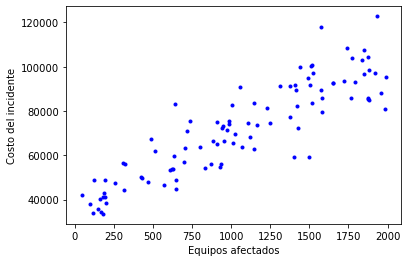

In [19]:
# Representación del conjunto de datos
plt.plot(df["n_equipos_afectados"], df["Costo"], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

### 4. Construcción del modelo

In [14]:
from sklearn.linear_model import LinearRegression

In [20]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df["n_equipos_afectados"].values.reshape(-1,1), df["Costo"].values) #fit(valores entrada, valores salida)

LinearRegression()

In [21]:
# Parámetro theta en unidades monetarias
lin_reg.intercept_

37346.04755534249

In [22]:
# Parámetro theta 1
lin_reg.coef_

array([32.8014998])

In [25]:
#Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]]) # 1200 equipos afectados
y_train_pred = lin_reg.predict(X_min_max)

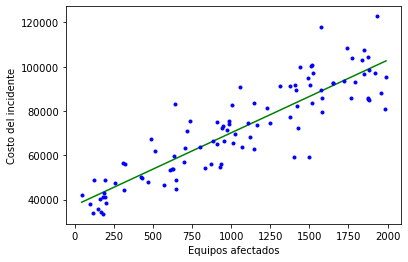

In [27]:
# Representación gráfica de la función de hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df["n_equipos_afectados"], df["Costo"], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()

### 5. Predicción de nuevos escenarios

In [29]:
x_new = np.array([[2500]]) #2500 equipos afectados, por ejemplo

#Predicción del costo que tendría el incidente

costo = lin_reg.predict(x_new)

print("El costo del incidente sería: ", int(costo[0]), "$")


El costo del incidente sería:  119349 $


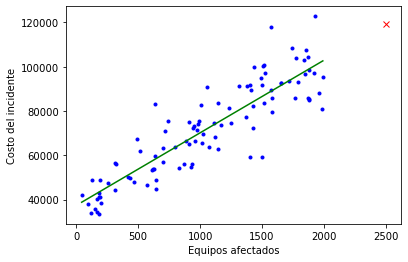

In [30]:
plt.plot(df["n_equipos_afectados"], df["Costo"], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, costo, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Costo del incidente")
plt.show()